In [1]:
#Необходимые библиотеки
import csv
from datetime import datetime
from tkinter import *
from tkinter import ttk
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk) 
import matplotlib.pyplot as plt

In [2]:
#Класс для хранения информации
class good:
    def __init__(self, information_string=''):
        data = self.informationFormat(information_string)
        
        if data:
            self.__correctness = True
            self.__orderNumber = data[0]
            self.__orderDate = data[1]
            self.__itemName = data[2]
            self.__itemCategory = data[3]
            self.__salesNumber = data[4]
            self.__itemPrice = data[5]
            self.__totalCost = data[6]
        else:
            self.__correctness = False
            self.__orderNumber = 0
            self.__orderDate = datetime.today()
            self.__itemName = ''
            self.__itemCategory = ''
            self.__salesNumber = 0
            self.__itemPrice = 0
            self.__totalCost = 0

    
    def informationFormat(self, information_string):
        information_list = information_string.split(';')
        formatted_data = []

        if len(information_list) != 7:
            return False

        #orderNumber
        if not information_list[0].isdigit():
            return False
        else:
            formatted_data.append(int(information_list[0]))

        #orderDate
        try:
            formatted_data.append(datetime.strptime(information_list[1], '%Y-%m-%d'))
        except ValueError:
            return False

        #itemName
        formatted_data.append(information_list[2])

        #itemCategory
        formatted_data.append(information_list[3])

        #salesNumber
        try:
            formatted_data.append(int(information_list[4]))
        except ValueError:
            return False

        #itemPrice
        try:
            formatted_data.append(float(information_list[5]))
        except ValueError:
            return False

        #totalCost
        try:
            formatted_data.append(float(information_list[6]))
        except ValueError:
            return False
            
        return formatted_data

    def getOrderNumber(self):
        return self.__orderNumber
    def getOrderDate(self):
        return self.__orderDate
    def getItemName(self):
        return self.__itemName
    def getItemCategory(self):
        return self.__itemCategory
    def getSalesNumber(self):
        return self.__salesNumber
    def getItemPrice(self):
        return self.__itemPrice
    def getTotalCost(self):
        return self.__totalCost
    def getCorrectness(self):
        return self.__correctness

In [3]:
#Ввод товаров из файла
goods_list = []
goods_dictionary = {}
goods_amount = {}

flag = False
with open('products.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        item = good(row[0])
        if item.getCorrectness():
            goods_list.append(item)
            if item.getItemName() in goods_dictionary:
                goods_dictionary[item.getItemName()].append(item)
                goods_amount[item.getItemName()] += item.getSalesNumber()
            else:
                goods_dictionary[item.getItemName()] = [item]
                goods_amount[item.getItemName()] = item.getSalesNumber()
        else:
            print('Ошибка, неправильные данные',)

Ошибка, неправильные данные


In [4]:
#Поиск самого ходового товара
def mPGood(dictionary):
    current_dictionary = {}
    for i in dictionary:
        for item in dictionary[i]:
            if item.getItemName() in current_dictionary:
                current_dictionary[item.getItemName()] += item.getSalesNumber()
            else:
                current_dictionary[item.getItemName()] = item.getSalesNumber()
    max_number = 0
    max_name = ''
    for i in current_dictionary:
        if current_dictionary[i] > max_number:
            max_number = current_dictionary[i]
            max_name = i
    return (max_name, max_number)

In [5]:
#Поиск самого прибыльного товара
def mProfitableProduct(dictionary):
    current_dictionary = {}
    for i in dictionary:
        for item in dictionary[i]:
            if item.getItemName() in current_dictionary:
                current_dictionary[item.getItemName()] += item.getTotalCost()
            else:
                current_dictionary[item.getItemName()] = item.getTotalCost()
    max_cost = 0
    max_name = ''
    for i in current_dictionary:
        if current_dictionary[i] > max_cost:
            max_cost = current_dictionary[i]
            max_name = i
    return (max_name, max_cost)

In [6]:
#Суммарная прибыть
def AllPtofits():
    all_profits = 0
    for i in goods_list:
        all_profits += i.getTotalCost()
    return all_profits

(-1.25, 1.25, -1.25, 1.25)

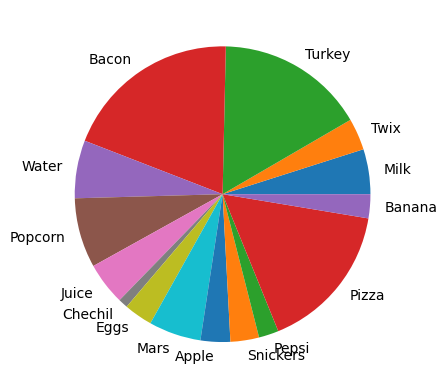

In [7]:
#Доля каждого товара в общей выручке
values = []
labels = []
all_profits = AllPtofits()
for i in goods_amount:
    labels.append(i)
    val = goods_amount[i] * goods_dictionary[i][0].getItemPrice()
    values.append(val / all_profits * 100)
fig, ax = plt.subplots()
ax.pie(values, labels=labels)
ax.axis()

In [8]:
#Вывод данных в консоль
if len(goods_list):
    print("Итоговая выручка", AllPtofits())
    print("Самый ходовой товар", mPGood(goods_dictionary))
    print("Самый прибыльный товар", mProfitableProduct(goods_dictionary))
    for i in goods_amount:
        print(i, "был продан", goods_amount[i], "раз")

Итоговая выручка 8338288.0
Самый ходовой товар ('Popcorn', 6643)
Самый прибыльный товар ('Bacon', 1907230.0)
Milk был продан 3909 раз
Twix был продан 2595 раз
Turkey был продан 3980 раз
Bacon был продан 6516 раз
Water был продан 4152 раз
Popcorn был продан 6643 раз
Juice был продан 2466 раз
Chechil был продан 441 раз
Eggs был продан 1528 раз
Mars был продан 4040 раз
Apple был продан 2295 раз
Snickers был продан 2209 раз
Pepsi был продан 1537 раз
Pizza был продан 3824 раз
Banana был продан 1283 раз


In [9]:
import random
def quickSort(nums):
   if len(nums) <= 1:
       return nums
   else:
       q = random.choice(nums)
       s_nums = []
       m_nums = []
       e_nums = []
       for n in nums:
           if n[0] < q[0]:
               s_nums.append(n)
           elif n[0] > q[0]:
               m_nums.append(n)
           else:
               e_nums.append(n)
       return quickSort(s_nums) + e_nums + quickSort(m_nums)

sorted_goods = []

for i in goods_amount:
    sorted_goods.append((goods_amount[i], i))
print(sorted_goods)
sorted_goods = quickSort(sorted_goods)
print(sorted_goods)


[(3909, 'Milk'), (2595, 'Twix'), (3980, 'Turkey'), (6516, 'Bacon'), (4152, 'Water'), (6643, 'Popcorn'), (2466, 'Juice'), (441, 'Chechil'), (1528, 'Eggs'), (4040, 'Mars'), (2295, 'Apple'), (2209, 'Snickers'), (1537, 'Pepsi'), (3824, 'Pizza'), (1283, 'Banana')]
[(441, 'Chechil'), (1283, 'Banana'), (1528, 'Eggs'), (1537, 'Pepsi'), (2209, 'Snickers'), (2295, 'Apple'), (2466, 'Juice'), (2595, 'Twix'), (3824, 'Pizza'), (3909, 'Milk'), (3980, 'Turkey'), (4040, 'Mars'), (4152, 'Water'), (6516, 'Bacon'), (6643, 'Popcorn')]


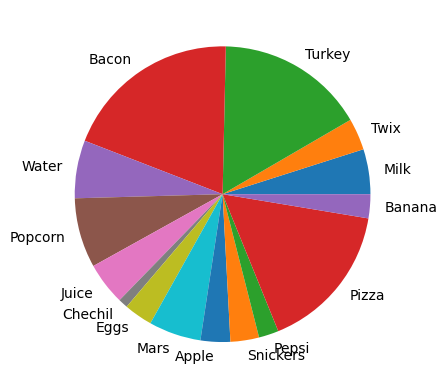

In [10]:
rootWindow = Tk()
rootWindow.title('Курсовая работа, Мидуркина Т.И.')
rootWindow.geometry("400x200+500+500")
rootWindow.resizable(False, False)
rootWindow.configure(bg='pink')


#Данные
def infoButtonClick():
    informationWindow = Toplevel(rootWindow)
    informationWindow.title('Данные')
    informationWindow.geometry("400x200+515+500")
    informationWindow.configure(bg='pink')
    label1 = ttk.Label(informationWindow, text="Курсовая работа", foreground="green")
    label2 = ttk.Label(informationWindow, text="Выполнила:\nМидуркина Татьяна Ивановна\nгруппа БФИ2204\n", foreground="green")
    label1.pack()
    label2.pack()

info_button = ttk.Button(text="Данные", width = 0, command=infoButtonClick)
info_button.grid(row=10, column=0, padx=4, pady=4)

#Общая выручка
def AllPtofitsButtonClick():
    AllPtofitsWindow = Toplevel(rootWindow)
    AllPtofitsWindow.title('Суммарная выручка')
    AllPtofitsWindow.geometry("400x200+515+500")
    AllPtofitsWindow.configure(bg='pink')
    label1 = ttk.Label(AllPtofitsWindow, text=f"Итоговая выручка", foreground="green")
    label2 = ttk.Label(AllPtofitsWindow, text=f"{AllPtofits()} рублей",  foreground="green")
    label1.pack()
    label2.pack()

all_profits_label = ttk.Label(text="Суммарная выручка", foreground="green", width = 0)
all_profits_button = ttk.Button(text="Вывести", width = 0, command=AllPtofitsButtonClick)
all_profits_label.grid(column = 0, row = 1)
all_profits_button.grid(column = 1, row = 1)



#Самый продаваемый товар

def theMPGoodButtonClick():
    mPGoodWindow = Toplevel(rootWindow)
    mPGoodWindow.title('Самый продаваемый товар')
    mPGoodWindow.geometry("400x200+515+500")
    mPGoodWindow.configure(bg='pink')
    k = mPGood(goods_dictionary)
    label1 = ttk.Label(mPGoodWindow, text="Самый продаваемый товар", foreground="green")
    label2 = ttk.Label(mPGoodWindow, text=f"{k[0]}")
    label3 = ttk.Label(mPGoodWindow, text="Его купили",foreground="green")
    label4 = ttk.Label(mPGoodWindow, text=f"{k[1]} раз", foreground="green")
    label1.pack()
    label2.pack()
    label3.pack()
    label4.pack()

m_p_good_label = ttk.Label(text="Самый продоваемый товар", foreground="green", width = 0)
m_p_good_button = ttk.Button(text="Вывести", width = 0, command=theMPGoodButtonClick)

m_p_good_label.grid(column = 0, row = 2)
m_p_good_button.grid(column = 1, row = 2)




#Самый прибыльный товар

def profitableProductButtonClick():
    mProfitableProductWindow = Toplevel(rootWindow)
    mProfitableProductWindow.title('Самый прибыльный товар')
    mProfitableProductWindow.geometry("400x200+515+500")
    mProfitableProductWindow.configure(bg='pink')
    k = mProfitableProduct(goods_dictionary)
    label1 = ttk.Label(mProfitableProductWindow, text="Самый прибыльный товар", foreground="green")
    label2 = ttk.Label(mProfitableProductWindow, text=f"{k[0]}")
    label3 = ttk.Label(mProfitableProductWindow, text="принес",foreground="green")
    label4 = ttk.Label(mProfitableProductWindow, text=f"{k[1]} рублей",foreground="green")
    label1.pack()
    label2.pack()
    label3.pack()
    label4.pack()

m_profitable_product_label = ttk.Label(text="Самый прибыльный товар", foreground="green", width = 0)
m_profitable_product_button = ttk.Button(text="Вывести", width = 0, command=profitableProductButtonClick)
m_profitable_product_label.grid(column = 0, row = 3)
m_profitable_product_button.grid(column = 1, row = 3)

#Финальный отчет
def finalReportButtonClick():
    finalReportWindow = Toplevel(rootWindow)
    finalReportWindow.title('Итоговый отчёт')
    finalReportWindow.configure(bg='pink')
    
    label1 = ttk.Label(finalReportWindow, text=f"Итоговая выручка", foreground="green")
    label2 = ttk.Label(finalReportWindow, text=f"{AllPtofits()} рублей", foreground="green")
    label1.pack()
    label2.pack()
    
    global values
    global labels
    all_profits = AllPtofits()
    fig, ax = plt.subplots()
    ax.pie(values, labels=labels)
    canvas = FigureCanvasTkAgg(fig, master = finalReportWindow)   
    canvas.draw() 
    canvas.get_tk_widget().pack()

    listbox = Listbox(finalReportWindow)
    listbox.pack(side=LEFT, fill=BOTH, expand=1)
    for i in goods_amount:
        listbox.insert(END, (i + " был продан " + str(goods_amount[i]) + " раз"))

    scrollbar = ttk.Scrollbar(finalReportWindow, orient="vertical", command=listbox.yview)
    scrollbar.pack(side=RIGHT, fill=Y)
      
    listbox["yscrollcommand"]=scrollbar.set

final_report_label = ttk.Label(text="Итоговый отчет", foreground="green", width = 0)
final_report_button = ttk.Button(text="Вывести", width = 0, command=finalReportButtonClick)
final_report_label.grid(column = 0, row = 4)
final_report_button.grid(column = 1, row = 4)
rootWindow.mainloop()